# Capstone Project - Olympic Data Analysis Using Pyspark

### Introduction

In this Olympic data , 110 countries were added in 49 sports from year  2000 to 2012 in olympic games. Also contains player names with their age and number of gold , silver and brone medals , they won . With total medals they won.<br></br>

| |  Variables  | Type    | Sub-Types   | 
|---:|:-------------|:-----------|:------|
| 1 | Name  | Categorical       |Nominal  | 
| 2 | Age   | Numeric  |Continuous  | 
| 3 | Country  | Categorical    |Nominal   |
| 4 | Year  | Categorical    |Ordinal   | 
| 5 | Date  | Categorical   |Ordinal   | 
| 6 | Sports  | Numeric    |Nominal    | 
| 7 | Gold_medal | Numeric    |Discrete    | 
| 8 | Silver_Medal  | Numeric    |Discrete    | 
| 9 | Brone_medal  | Numeric    |Discrete    | 
| 10 | Total_Medal  | Numeric    |Disrete   |      



In [1]:
pip install pyspark     # installing pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 49.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=44a0f4e519894bdfb5ff864ff2251a4bd51ebe009fd7aedd4ff8ab035dfe6689
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession     # an entry point to PySpark t     

spark = SparkSession.builder.appName('Project').getOrCreate()   # i.e creation of spark session

## Q1. Write PySpark code to read olympix_data.csv file

In [4]:
df = spark.read.format("csv").option("header", "true").option("inferSchema","true").load("/content/olympic_datas.csv")  # create dataframe from csv file

## Q2. Write PySpark code to print the Olympic Sports/games in the dataset.

In [5]:
df.select("sports").distinct().count()  # use distinct count to count sports in the data

49

sports = 49

In [6]:
df.select("sports").distinct().show(n=49)  # use distinct and show to print sports

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

Above list of sports in the dataset

## Q3.Write PySpark code  the total number of medals in  each Olympic Sport/game

In [7]:
df.groupby("sports").sum("total_medal").show(n = 49)  # use group by for sports and sum for add total medal

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
|          Equestrian|             182|
|            Shooting|             192|


Above list of the total number of medals in  each Olympic Sport/game

## Q4. Sort the result based on the total number of medals.

In [8]:
import pyspark.sql.functions as f    # take sql function as f
sport_total =df.groupby("sports").sum("total_medal")   #use gruop by and sum for total metals
sport = sport_total.orderBy(f.desc("sum(total_medal)")) # use order by for ordering and also use desc or descending ordering 
sport.show(n = 49)  # show result

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|            Swimming|             765|
|           Athletics|             753|
|              Rowing|             576|
|            Football|             407|
|              Hockey|             387|
|          Ice Hockey|             384|
|            Handball|             351|
|            Canoeing|             333|
|           Waterpolo|             306|
|             Cycling|             306|
|          Basketball|             287|
|          Gymnastics|             282|
|          Volleyball|             279|
|             Fencing|             256|
|           Wrestling|             245|
|                Judo|             224|
|            Baseball|             216|
|             Sailing|             210|
|            Shooting|             192|
|              Boxing|             188|
|          Equestrian|             182|
|       Weightlifting|             180|


sorted  total number of medals in each Olympic Sport/game

## Q5. Find the total number of medals won by each country in swimming.

In [19]:
hf = df.filter(df.sports == "Swimming")  # filtering  swimming sport rows from data
gf = hf.groupby("country").sum("total_medal").orderBy(f.desc("sum(total_medal)")) # and then group by each country
n = gf.count()
gf.show(n) # result show

+-------------------+----------------+
|            country|sum(total_medal)|
+-------------------+----------------+
|      United States|             267|
|          Australia|             163|
|        Netherlands|              46|
|              Japan|              43|
|             France|              39|
|              China|              35|
|            Germany|              32|
|             Russia|              20|
|              Italy|              16|
|      Great Britain|              11|
|       South Africa|              11|
|             Sweden|               9|
|            Hungary|               9|
|             Brazil|               8|
|            Ukraine|               7|
|           Zimbabwe|               7|
|            Romania|               6|
|             Canada|               5|
|        South Korea|               4|
|             Poland|               3|
|            Austria|               3|
|            Tunisia|               3|
|              Spain|    

Above list of total number of medals won by each country in swimming.

## Q6. Find the total number of medals won by each country in Skeleton.

In [20]:
hf = df.filter(df.sports == "Skeleton") # # filtering  skeleton sport rows from data
gf = hf.groupby("country").sum("total_medal").orderBy(f.desc("sum(total_medal)")) # and then group by each country
gf.show()  # result show

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|  Switzerland|               3|
|United States|               3|
|      Germany|               2|
|       Russia|               1|
|      Austria|               1|
|       Latvia|               1|
+-------------+----------------+



above list of total number of medals won by each country in Skeleton

## Q7. Find the number of medals that the US won yearly.

In [21]:
qf = df.filter(df.country == "United States")  # filter data by using country united states
vf = qf.groupby("year").sum("total_medal").orderBy(f.desc("sum(total_medal)"))  # then use group by year and use sum for add total medals
vf.show() # result show

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2008|             317|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2002|              84|
|2006|              52|
+----+----------------+



Above table is the number of medals that the US won yearly.


## Q8. Find the total number of medals won by each country.

In [22]:
import pyspark.sql.functions as f  # use function f of sql
sf =df.groupby("country").sum("total_medal") # use groupby country then use sum for add medals
Country = sf.orderBy(f.desc("sum(total_medal)")) # use order by and desc for descending ordering
Country.show(n = 110)  # result show

+--------------------+----------------+
|             country|sum(total_medal)|
+--------------------+----------------+
|       United States|            1312|
|              Russia|             768|
|             Germany|             629|
|           Australia|             609|
|               China|             530|
|              Canada|             370|
|               Italy|             331|
|       Great Britain|             322|
|              France|             318|
|         Netherlands|             318|
|         South Korea|             308|
|               Japan|             282|
|              Brazil|             219|
|               Spain|             205|
|              Norway|             192|
|                Cuba|             188|
|              Sweden|             181|
|             Hungary|             145|
|             Ukraine|             143|
|           Argentina|             140|
|             Romania|             123|
|             Finland|             118|


above table is the total number of medals won by each country.

## Q9 Who was the oldest athlete in the olympics? 

In [23]:
df.agg({'age': 'max'}).show()  # use aggregate max function

+--------+
|max(age)|
+--------+
|    61.0|
+--------+



Whose age was greater  -- that was oldest athlete

In [24]:
Age = df.filter(df.age == 61)   # filtering the age 
Age.show()

+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar|61.0| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+



Ian Millar was oldest athlete

## Q10. Which country was he/she from?

In [25]:
Age = df.filter(df.age == 61)  # filter age variable
Age.show() # show age

+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar|61.0| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+



He was from Canada

## Q11 plot the total number of medals in  each Olympic Sport/game

In [26]:
import pandas as  pd   # use for data analysis
import matplotlib.pyplot as plt   # use for data visualisation
import seaborn as sns  # use for data visualisation

In [28]:
olympix = df.toPandas()   # converting pyspark dataframe to pandas dataframe
olympix.head()  # reading 1 st five rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [30]:
total_sport = olympix.groupby(['sports'])["total_medal"].sum().sort_values(ascending=False)
total_sport   # the total number of medals in  each Olympic Sport/game in descending order

sports
Swimming                     765
Athletics                    753
Rowing                       576
Football                     407
Hockey                       387
Ice Hockey                   384
Handball                     351
Canoeing                     333
Waterpolo                    306
Cycling                      306
Basketball                   287
Gymnastics                   282
Volleyball                   279
Fencing                      256
Wrestling                    245
Judo                         224
Baseball                     216
Sailing                      210
Shooting                     192
Boxing                       188
Equestrian                   182
Weightlifting                180
Cross Country Skiing         174
Diving                       144
Speed Skating                140
Biathlon                     138
Short-Track Speed Skating    138
Softball                     134
Synchronized Swimming        129
Taekwondo                    112
Bad

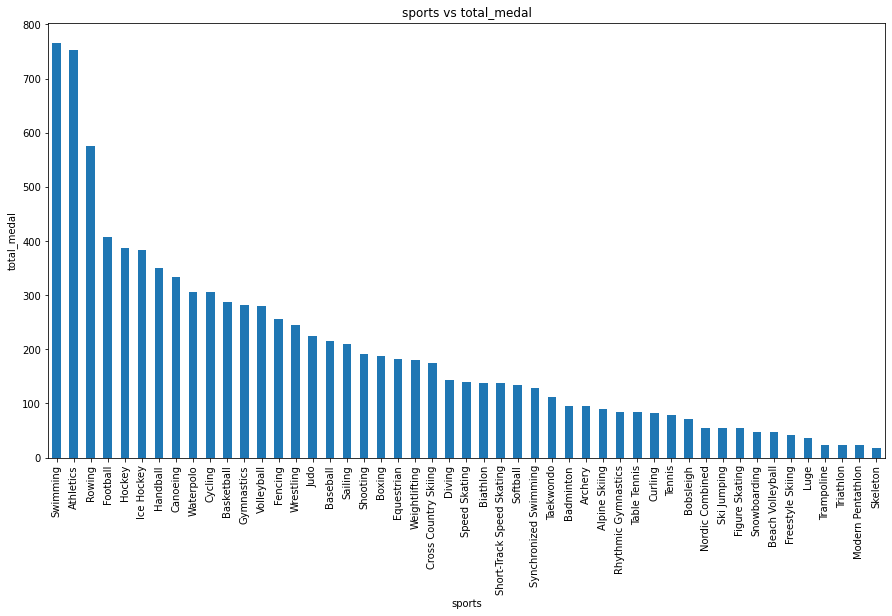

In [31]:
total_sport.plot(kind='bar', title='sports vs total_medal', ylabel='total_medal',
         xlabel='sports', figsize=(15,8)) # bar plot sports vs total_medal

From above plot large total  medals in sports like swimming,athletics, rowing, football and hockey

### Top 10 sports with total medals

In [32]:
total_sport = olympix.groupby(['sports'])["total_medal"].sum().sort_values(ascending=False).head(10)
total_sport   # the total number of medals in  each Olympic Sport/game in descending order

sports
Swimming      765
Athletics     753
Rowing        576
Football      407
Hockey        387
Ice Hockey    384
Handball      351
Canoeing      333
Waterpolo     306
Cycling       306
Name: total_medal, dtype: int32

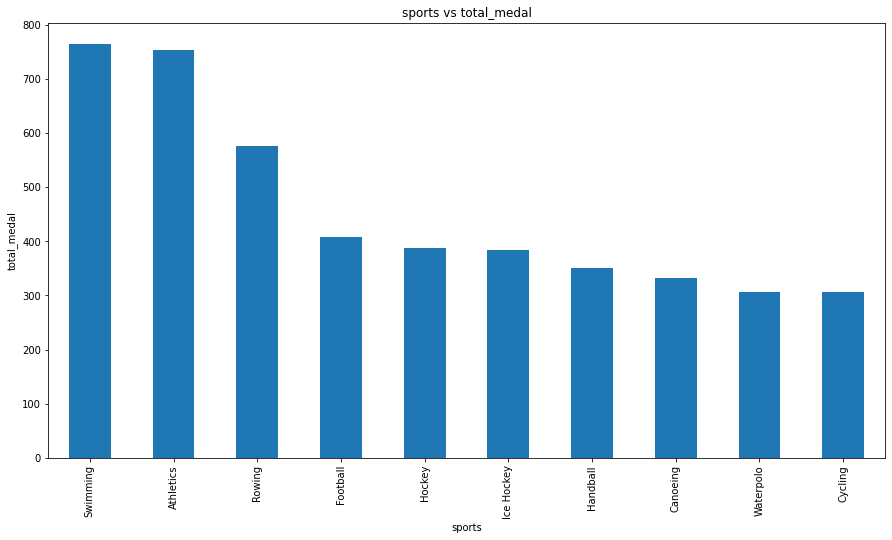

In [33]:
total_sport.plot(kind='bar', title='sports vs total_medal', ylabel='total_medal',xlabel='sports', figsize=(15,8)) # bar plot sports vs total_medal


From above plot large total medals in sports like swimming,athletics, rowing, football and hockey